# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [7]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

# Create two new dataframes

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [8]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

1. 9 Reps at the North branch, 11 Reps at the South branch.

2.Average for the North branch:
Busy Minutes             9.987755
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

Average for the South Branch:
Busy Minutes             10.054140
Incoming Wait Time        3.000000
During Call Wait Time     3.076433

3. Number of calls for each branch:
North: 
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5

South:
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5


In [9]:
# Put your EDA code here
north_df["Rep ID"].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [10]:
avgcols = ["Busy Minutes", "Incoming Wait Time", "During Call Wait Time"]
north_df[avgcols].mean()

Busy Minutes             9.987755
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [11]:
north_df["Time Block"].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [12]:
south_df["Rep ID"].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [13]:
avgcols = ["Busy Minutes", "Incoming Wait Time", "During Call Wait Time"]
south_df[avgcols].mean()

Busy Minutes             10.054140
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [14]:
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

1. Yes the null represents Outgoing
2. I got rid of the Sale column since it wasn't needed
3. I didn't see any unneccessary duplicates
4. I dropped the columns like Sale, Lost Call, and Unnamed

In [15]:
# Clean your data here
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<AxesSubplot:>

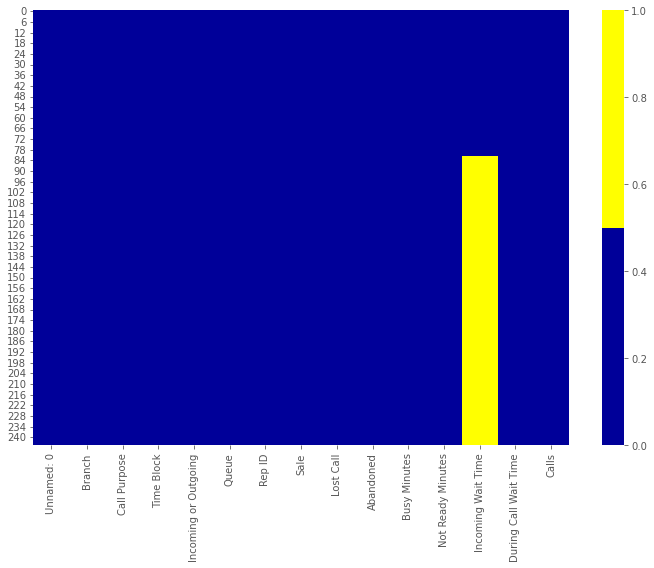

In [16]:
cols = north_df.columns[:30] 
colours = ['#000099', '#ffff00'] 
sb.heatmap(north_df[cols].isnull(), cmap=sb.color_palette(colours))

In [17]:
ndf = north_df.drop(['Lost Call', 'Sale', 'Unnamed: 0'], axis=1)
ndf.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,8,2,1.0,4,1


In [18]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<AxesSubplot:>

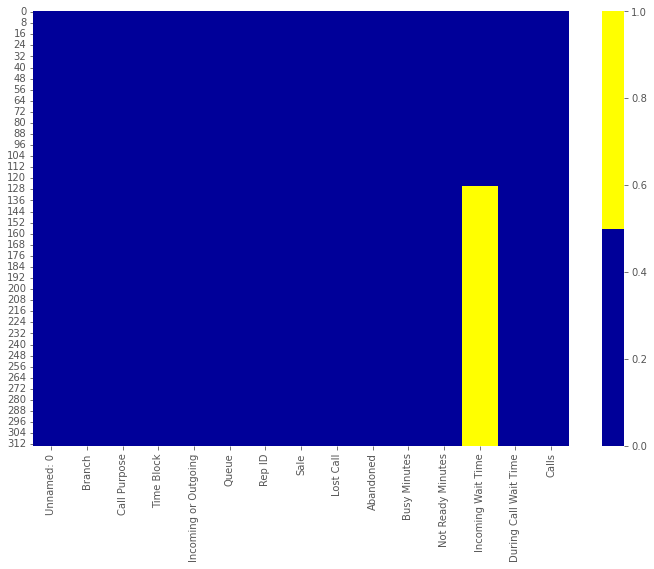

In [19]:
cols = south_df.columns[:30] 
colours = ['#000099', '#ffff00'] 
sb.heatmap(south_df[cols].isnull(), cmap=sb.color_palette(colours))

In [20]:
sdf = south_df.drop(['Lost Call', 'Sale', 'Unnamed: 0'], axis=1)
sdf.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,8,3,1.0,3,1


## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

1. Brent had the highest calls in the North Branch and Eric had the highest in the South branch
2. The average call percentage of dropped calls for the entire company is 2%. For the North branch it was 1.25% and for South it was .72%.
3. All the calls are answered in 1 second making them all at 100% for the company and both branches. 
4. Thew average is also 1 second 


In [21]:
# Manipulate data here
df = pd.merge(ndf, sdf, how='outer')
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,0,10,1,NaN,2,1


In [22]:
df.groupby('Rep ID').Calls.sum().sort_values(ascending=False)

Rep ID
Brent     37
Eric      35
Randy     33
Sandy     32
Helga     31
Lilly     30
Todd      29
Duke      29
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Joe       26
Sharon    25
Xander    24
Cam       24
Amanda    23
Andy      23
Alice     20
Name: Calls, dtype: int64

In [ ]:
#abandonment per company

In [23]:
df.value_counts('Abandoned')

Abandoned
0    548
1     11
dtype: int64

In [40]:
column_name = 'Abandoned'
totalabandonedcalls = df['Abandoned'].value_counts().sum()
totalabandonedcalls

559

In [41]:
abandonedcalls = df.Abandoned.value_counts()[1]
abandonedcalls

11

In [42]:
Coabandoned = abandonedcalls / totalabandonedcalls.sum() * 100
Coabandoned

1.9677996422182469

In [43]:
df.groupby('Branch').Abandoned.sum().sort_values(ascending=False)

Branch
North    7
South    4
Name: Abandoned, dtype: int64

In [44]:
#abandonment rate per branch

In [45]:
(ndf["Abandoned"].sum()/ndf["Calls"].sum())*100

2.857142857142857

In [46]:
(sdf["Abandoned"].sum()/sdf["Calls"].sum())*100

1.2738853503184715

In [47]:
#servicelevel =
Waittimecol = 'Incoming Wait Time'
waittime = df['Incoming Wait Time'].value_counts().sum()
waittime

208

In [144]:
Waittimecol = 'Incoming Wait Time'
waittime = ndf['Incoming Wait Time'].value_counts().sum()
waittime

82

In [145]:
Waittimecol = 'Incoming Wait Time'
waittime = sdf['Incoming Wait Time'].value_counts().sum()
waittime

126

In [48]:
incomingcalls = df.groupby('Incoming or Outgoing').Calls.sum()['Incoming']
incomingcalls

208

In [49]:
Co_incomingwaittime = waittime / incomingcalls.sum() * 100
Co_incomingwaittime

100.0

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [221]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb


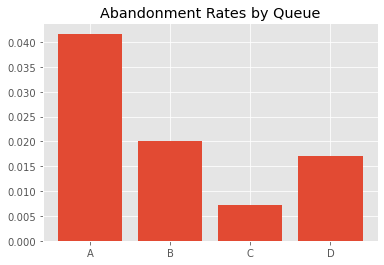

In [305]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

    
branchqueue = list(abandonment_rates.keys())  
rates = list(abandonment_rates.values())
x = np.array(branchqueue)
y = np.array(rates)
plt.title("Abandonment Rates by Queue")
plt.bar(x,y)
plt.show()


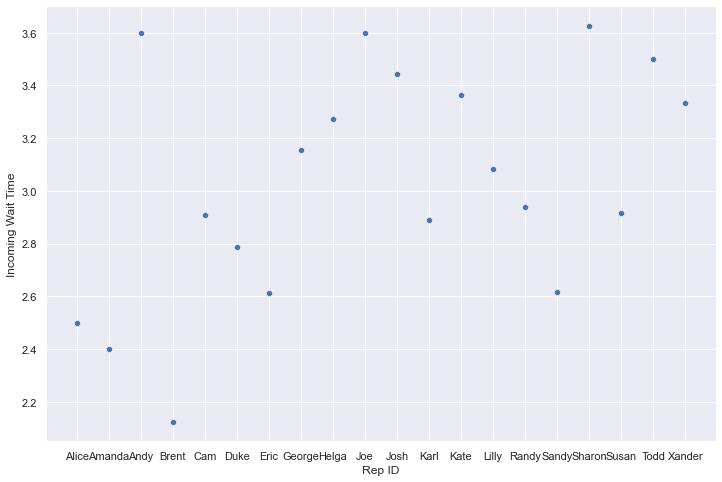

In [143]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[10
                    +df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()
total_stats = rep_calls.groupby(["Rep ID"]).sum()

sb.scatterplot(data=north_plt, x="Rep ID", y="Incoming Wait Time")



# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = ndf[ndf["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

 


In [142]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()




sb.set_theme(style="darkgrid")
purpose_group = sb.load_dataset("Call Purpose")
ax = sb.countplot(x="purpose_counts", hue="purpose_group", data=ndf)

ValueError: 'Call Purpose' is not one of the example datasets.

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

I felt like the north branch wass operating more efficiently because the reps were taking more calls, and had a lower incoming wait time.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help? 
I think the South branch needs more help 
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
